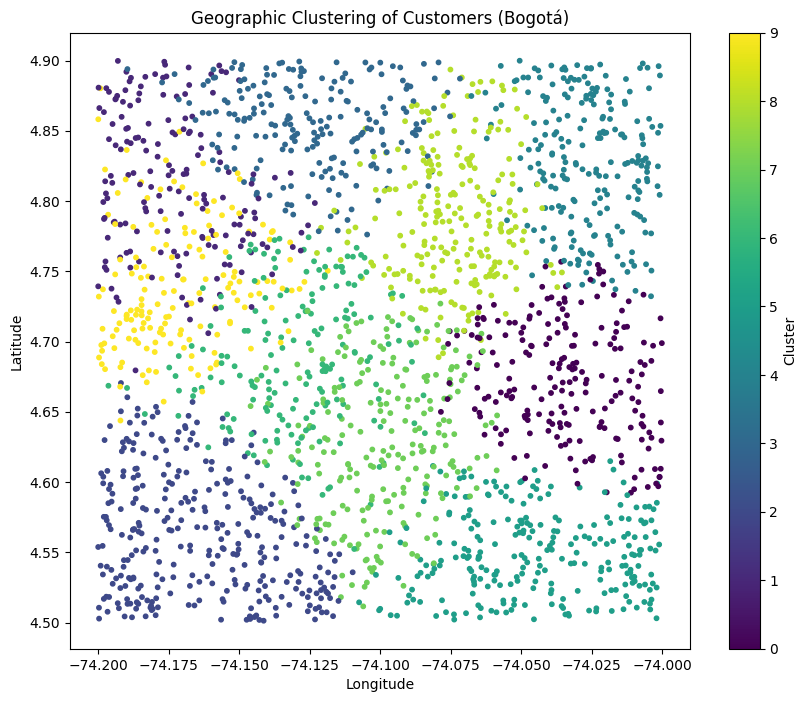

   Cluster  Dry_Demand  Chilled_Demand  Frozen_Demand  Latitude  Longitude
0        0        1844            1761           1106  4.672620 -74.034133
1        1        1637            1784            710  4.811521 -74.172805
2        2        3257            2397           1539  4.563262 -74.163151
3        3        1935            1244           1124  4.854374 -74.123993
4        4        2477            1556           1235  4.827738 -74.026565
5        5        2527            1857           1355  4.549543 -74.044835
6        6        1507            1594           1303  4.687885 -74.129252
7        7        2505            1575            833  4.627615 -74.098338
8        8        2775            2092           1120  4.788444 -74.073969
9        9        1800             721            814  4.739107 -74.171264


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Generate Synthetic Customer Data for Bogotá

np.random.seed(42)  # For reproducibility
num_customers = 2199

# Random geographic coordinates around Bogotá
latitudes = np.random.uniform(4.5, 4.9, size=num_customers)
longitudes = np.random.uniform(-74.2, -74.0, size=num_customers)

# Random demand for different product types (dry, chilled, frozen)
dry_demand = np.random.randint(1, 20, size=num_customers)
chilled_demand = np.random.randint(1, 15, size=num_customers)
frozen_demand = np.random.randint(1, 10, size=num_customers)

# Customer DataFrame
customers = pd.DataFrame({
    'Customer_ID': np.arange(1, num_customers + 1),
    'Latitude': latitudes,
    'Longitude': longitudes,
    'Dry_Demand': dry_demand,
    'Chilled_Demand': chilled_demand,
    'Frozen_Demand': frozen_demand
})

# Step 2: Prepare Data for Clustering

# Define weights for geographical features and demand features
alpha = 0.7  # Weight for geographical features
beta = 0.3   # Weight for demand features

# Scale geographical features
scaler_geo = StandardScaler()
geo_features = scaler_geo.fit_transform(customers[['Latitude', 'Longitude']]) * alpha

# Scale demand features
scaler_demand = StandardScaler()
demand_features = scaler_demand.fit_transform(customers[['Dry_Demand', 'Chilled_Demand', 'Frozen_Demand']]) * beta

# Combine features
combined_features = np.hstack((geo_features, demand_features))

# Step 3: Apply MiniBatchKMeans Clustering

n_clusters = 10  # Adjust the number of clusters as needed
kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42, batch_size=1000)
customers['Cluster'] = kmeans.fit_predict(combined_features)

# Visualize the Clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(customers['Longitude'], customers['Latitude'], c=customers['Cluster'], cmap='viridis', s=10)
plt.title("Geographic Clustering of Customers (Bogotá)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(scatter, label='Cluster')
plt.show()

# Step 4: Prepare Clusters for MILP (Save Cluster Information)

def prepare_clusters_for_milp(customers):
    cluster_summary = customers.groupby('Cluster').agg({
        'Dry_Demand': 'sum',
        'Chilled_Demand': 'sum',
        'Frozen_Demand': 'sum',
        'Latitude': 'mean',
        'Longitude': 'mean'
    }).reset_index()
    return cluster_summary

cluster_summary = prepare_clusters_for_milp(customers)
print(cluster_summary)

# Save the result to a CSV file
cluster_summary.to_csv('clusters_for_milp.csv', index=False)
